# Examples of the Best Practices for Data Science Visualizations

_Visualizations are meant to supplement and provide clarity and insight into the claims being made about the data. People are generally not analytical and are naturally better at interpreting information visually. Thus, as a data scientist, it is important to present this information in a way that accurately provides a clear visual representation of the data, and what the story behind the data is._

There are many different graphs that one can select in order to create a visualization based on their data type, and in this notebook we will explore five of the most common ones. These will include a time series, histogram, scatter plot, bar chart, and pie chart. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #primary library used for our data science visualizations
from scipy.integrate import odeint
import warnings
warnings.filterwarnings('ignore')

# Time Series

A time series plot allows us to visualize changes that occur over time. The x-axis will be the time axis, and the y-axis contains the data that is being measured over time. 

In [2]:
#create function to model ATP and glucose concentrations in glycolysis
k1 = 0.02
kp = 6
km = 13
vin = 0.36
atp = 4
g = 3
y0 = [atp, g]
t = np.arange(0, 500, 0.01)
print(t)

def func(y, t, k1, kp, vin, km): 
    atp, g = y
    dydt = [ 2*k1*g*atp - ((kp*atp)/(atp+km)), vin - k1*g*atp]
    return dydt

out = odeint(func, y0, t, args = (k1, kp, vin, km))

[0.0000e+00 1.0000e-02 2.0000e-02 ... 4.9997e+02 4.9998e+02 4.9999e+02]


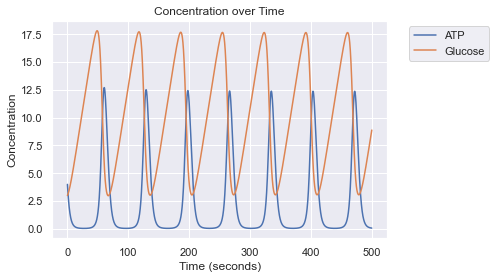

In [3]:
sns.set()
sns.lineplot(t, out[:, 0], label = 'ATP')
sns.lineplot(t, out[:, 1], label = 'Glucose')
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration')
plt.title('Concentration over Time')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### **Description:**

**What is being measured and plotted?**

The Concentration over Time plot shows ATP and Glucose concentrations changing over time based on a two dimensional ODE model for these two molecules during glycolysis. 

**Why is it being measured and plotted?**

The time series plot allows us to visualize the changes in concentration over time during glycolysis in order to better understand some of the driving forces in the biochemical reaction pathway.   

**Why is it important to visualize it specifically in the way it is being presented?**

By plotting the ATP and glucose concentrations over time it is possible to visualize the dynamics of the glycolysis reaction, rather than purely looking at the steps of the biochemical reaction.

**What insights can be made based on the plots?**

The plot shows oscillatory behavior, where an increase in glucose concentration drives an increase in the ATP concentration. When the glucose concentration decreases, the ATP concentration also decreases with a short delay. Hence, the glucose concentration is what drives changes in the ATP concentration. The oscillations occur at the same frequency indicating that glucose and ATP concentrations are paired/dependent on each other. 

**Key Things to Note:** 
Title, axis labels, units, legend


### Import Data

In [4]:
#import and preview the data
bike = pd.read_csv("Bike.csv")
bike.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25317046,10/7/19 13:39,10/7/19 14:05,4231,1533.0,424,Museum of Science and Industry,355,South Shore Dr & 67th St,Customer,NaN,NaN
1,25577704,10/27/19 16:44,10/27/19 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0
2,25823341,12/4/19 17:24,12/4/19 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0
3,25735449,11/19/19 18:32,11/19/19 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0
4,25716762,11/16/19 21:09,11/16/19 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0


In [5]:
#cleaning divvy bike data
bikeND = bike.drop_duplicates()
bikeND.loc[12, 'from_station_name'] = 'University Ave & 57th St'
bikeND.loc[175, 'from_station_name'] = 'Ellis Ave & 53rd St'
bikeND.loc[44, 'to_station_name'] = 'Ellis Ave & 60th St'
bikeND.loc[276, 'to_station_name'] = 'University Ave & 57th St' 

# Histogram

A histogram allows us to see a frequency distribution of the data. The width of the rectangles reflects the interval by which all the data was divided ('bins'), and the height represents the frequency at which those values occur in the data set. 

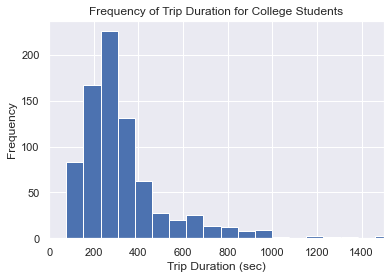

In [6]:
no_nas = bikeND.dropna()
college = np.ones(no_nas.shape[0])
college[no_nas.birthyear<1997]=0 #not college
college[no_nas.birthyear>2001]=0 #not college
no_nas.insert(12, 'college', college)
no_nas.head(12)

students = no_nas[no_nas.college==1]
notstud = no_nas[no_nas.college==0]

sns.set()
students.hist(column = 'tripduration', bins=1000)
plt.title('Frequency of Trip Duration for College Students')
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Frequency')
plt.xlim(0,1500)
plt.show()

### **Description:**

**What is being measured and plotted?**

The histogram above shows ride trip duration for college students.

**Why is it being measured and plotted?**

We are interested in seeing the distribution of trip duration to understand how long most trips are for college students.

**Why is it important to visualize it specifically in the way it is being presented?**

By visualizing the data as a histogram it is possible to see the distribution of the trip durations therefore providing a visual summary of the continuous duration data. 

**What insights can be made based on the plots?**

The histogram is skewed to the right which means that college students take more shorter trips than longer trips. The distribution appears to be centered around 250 seconds or about 4 minutes. Overall, this makes sense because college students would most likely be using the bikes for short trips around campus or to surrounding stores in the area.  

**Key Things to Note:** 
Title, axis labels, units, grid lines


# Scatter Plot

A scatter plot can be used to visualize the relationship (and possible correlation) between numerical variables. 

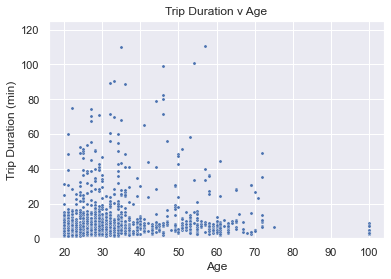

In [7]:
#Calculating Age v Trip Duration
age = 2021-no_nas.birthyear
no_nas.insert(13, 'age', age)

sns.scatterplot(no_nas.age, no_nas.tripduration/60, s = 10)
plt.ylim(0,125)
plt.xlabel('Age')
plt.ylabel('Trip Duration (min)')
plt.title('Trip Duration v Age')
plt.show()

### **Description:**

**What is being measured and plotted?**

The data consists of Chicago Divvy Bike data from Spring 2019 centered around Hyde Park. The plot above shows the total trip duration in minutes vs age of the rider. 

**Why is it being measured and plotted?**

We are interested in seeing if there is a relationship between trip duration and the rider’s age. 

**Why is it important to visualize it specifically in the way it is being presented?**

The scatter plot allows us to see if there is any correlation between trip duration and age. 

**What insights can be made based on the plots?**

Based on the plot, we can see that there does appear to be any strong correlation between trip duration and age, since most rides fall under 20 minutes across all ages. Furthermore, longer rides (20+ minutes) are also spread out among all ages, although there are less of them. 

**Key Things to Note:** 
Title, axis labels, point size


# Bar Chart

Bar charts allow us to visualize categorical data, where each bar has a height proportional to the data's value. 

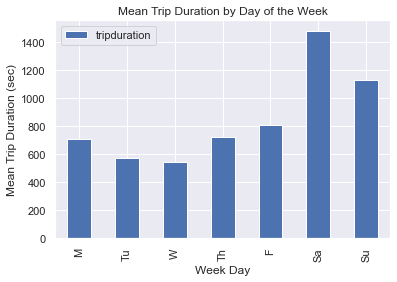

In [8]:
dow = pd.DatetimeIndex(bikeND['start_time']).day_name()
bikeND.insert(12, 'weekday', dow)
downum = pd.DatetimeIndex(bikeND['start_time']).dayofweek
bikeND.insert(13, 'weekday_num', downum)

dow_mean = bikeND.groupby(by='weekday_num').mean()
dow_mean['Week Day'] = ['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su']

sns.set()
dow_mean.plot.bar(x = 'Week Day', y = 'tripduration')
plt.ylabel('Mean Trip Duration (sec)')
plt.title('Mean Trip Duration by Day of the Week')
plt.show()

### **Description:**

**What is being measured and plotted?**

Chicago Divvy Bike data was grouped by days of the week and the average trip duration was calculated for each weekday. 

**Why is it being measured and plotted?**

We are interested in seeing the lengths of trips based on days of the week - what day of the week do riders take the shortest or longest rides.

**Why is it important to visualize it specifically in the way it is being presented?**

The bar chart allows us to visualize the mean trip duration (numerical) over different days of the week (categorical).  

**What insights can be made based on the plots?**

Based on the bar chart above, Wednesday’s, on average, have the shortest bike trips, while Saturday’s have the longest trips. 

**Key Things to Note:** 
Title, axis labels, units, scaling


# Pie Chart

A pie chart divides the data into 'slices', where each data slice is a numerical proportion of the whole data set. This allows us to visualize the data parts relative to the overall data.

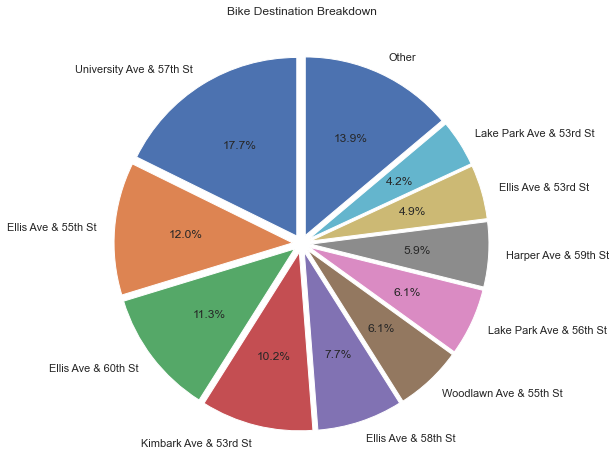

In [9]:
s_count = bikeND.groupby('to_station_name').size().to_frame('size').reset_index()
s_count_top = s_count.sort_values('size', ascending = False).iloc[0:10]
other = s_count.sort_values('size', ascending = False).iloc[11:66]
sum_other = sum(other['size'])
other_row = {'to_station_name':'Other', 'size': sum_other}
s_count_top = s_count_top.append(other_row, ignore_index=True)

sns.set()
explode = [0.05]*len(s_count_top['size']) 
plt.figure(figsize=(8,12))
plt.pie(s_count_top['size'], labels=s_count_top['to_station_name'], autopct='%1.1f%%', \
        explode=explode, startangle=90)
plt.title('Bike Destination Breakdown')
plt.show()

### **Description:**

**What is being measured and plotted?**

The top bike trip destinations are plotted in a pie chart.

**Why is it being measured and plotted?**

We are interested in viewing the breakdown of bike destinations. It provides insight into which stations are more popular. 

**Why is it important to visualize it specifically in the way it is being presented?**

The pie chart allows us to have a visual representation of all the destinations as parts of a whole. 

**What insights can be made based on the plots?**

The most popular divvy bike destination was University Ave and 57th street which is actually the center of the University of Chicago campus. 

**Key Things to Note:** 
Title, labels (location - categorical, percentages - numerical)


# Conclusion

The five examples above are just a few of the types of visualizations one can use to display data. Hopefully they can help you make stronger and more clear data visualizations, as well as inspire you to explore the many other types of ways to visualize data. 
